## **IMPORTING LIBRARIES**

In [205]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

import warnings 
warnings.filterwarnings('ignore',category=DeprecationWarning)

## **DATA COLLECTION AND ANALYSIS**

In [206]:
train=pd.read_csv('CarPrice_Assignment.csv')
train.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [208]:
def summary(train):
    sum = pd.DataFrame(train.dtypes, columns=['dtypes'])
    sum['missing#'] = train.isna().sum()
    sum['missing%'] = (train.isna().sum().values*100)/len(train)
    sum['uniques'] = train.nunique().values
    sum['count'] = train.count().values
    # sum['value_counts']=train.value_counts()
    # sum['skew'] = train.skew().values
    desc = pd.DataFrame(train.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(train).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
car_ID,int64,0,0.000000,205,205,1.000000,205.000000,103.000000
symboling,int64,0,0.000000,6,205,-2.000000,3.000000,0.834146
CarName,object,0,0.000000,147,205,nan,nan,nan
fueltype,object,0,0.000000,2,205,nan,nan,nan
aspiration,object,0,0.000000,2,205,nan,nan,nan
doornumber,object,0,0.000000,2,205,nan,nan,nan
carbody,object,0,0.000000,5,205,nan,nan,nan
drivewheel,object,0,0.000000,3,205,nan,nan,nan
enginelocation,object,0,0.000000,2,205,nan,nan,nan
wheelbase,float64,0,0.000000,53,205,86.600000,120.900000,98.756585


In [209]:
train.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [210]:
train.duplicated().sum()

0

In [211]:
train.drop(['car_ID'],axis=1,inplace=True)

## **DATA VISUALIZATION**

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>,
        <AxesSubplot:title={'center':'carwidth'}>],
       [<AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>,
        <AxesSubplot:title={'center':'boreratio'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peakrpm'}>],
       [<AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

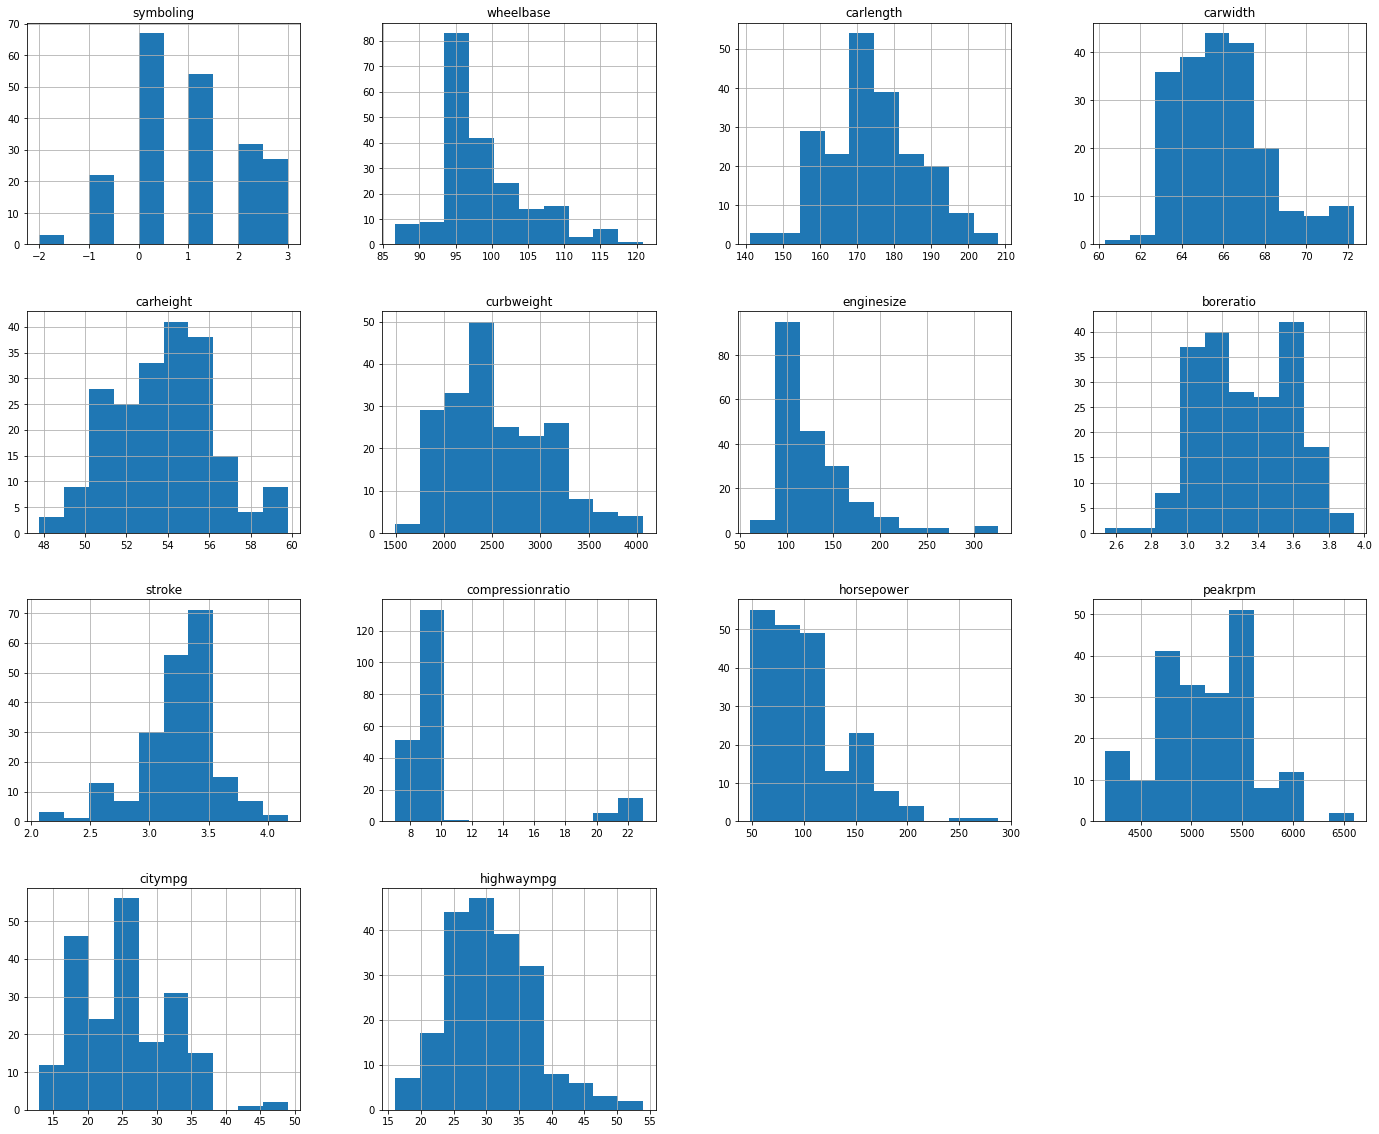

In [212]:
train_without_price = train.drop(columns=['price'])
train_without_price.hist(figsize=(24, 20))

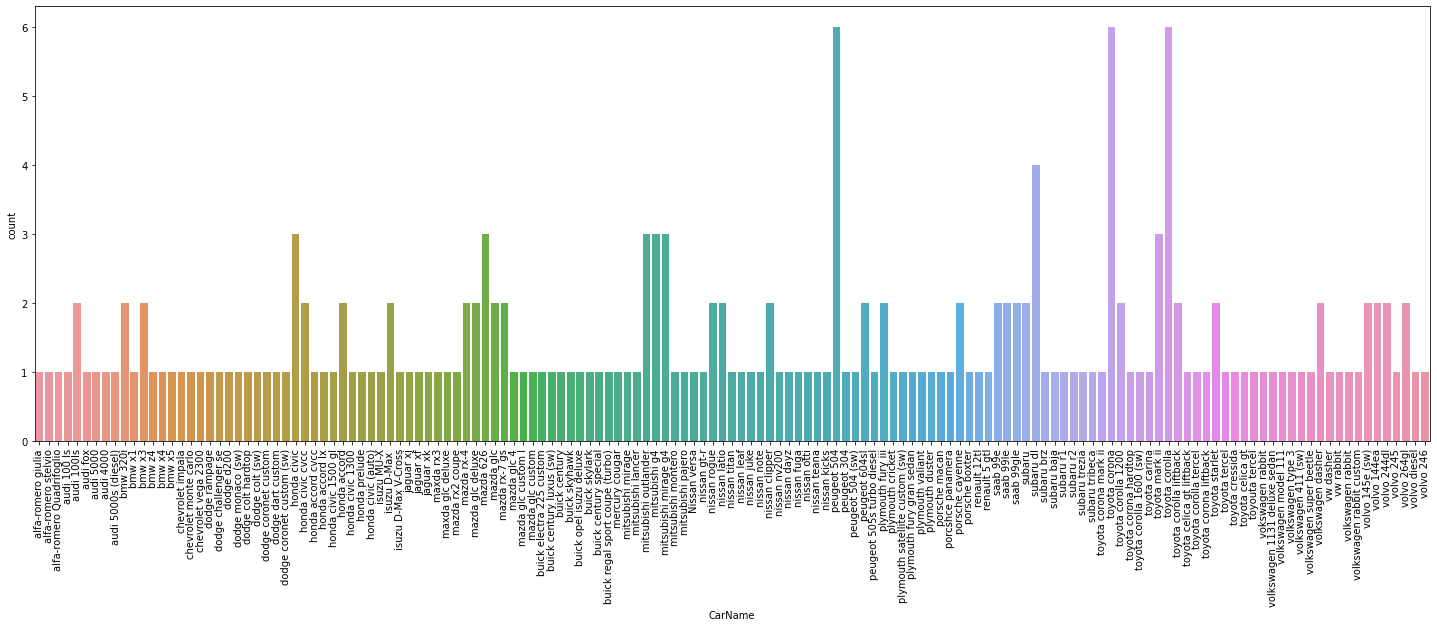

In [213]:
plt.figure(figsize=(25,8))
sns.countplot(data=train,x='CarName')
plt.xticks(rotation=90)
plt.show()

In [214]:
train.drop(['CarName'],axis=1,inplace=True)

<AxesSubplot:xlabel='symboling', ylabel='count'>

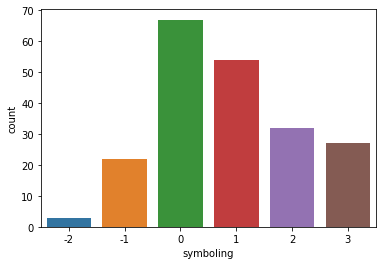

In [215]:
# "symboling” = corresponds to a car's insurance risk level. Cars are initially assigned a risk factor symbol that corresponds to their price. If an automobile is more dangerous, this symbol is adjusted by increasing it.
sns.countplot(data=train,x='symboling')

<Figure size 720x504 with 0 Axes>

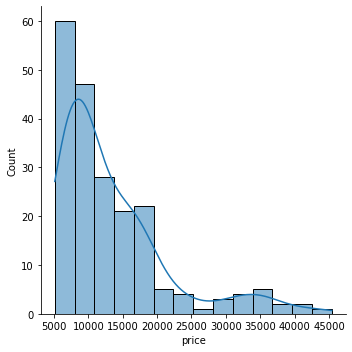

In [216]:
plt.figure(figsize=(10,7))
sns.displot(train['price'],kde=True)

<AxesSubplot:>

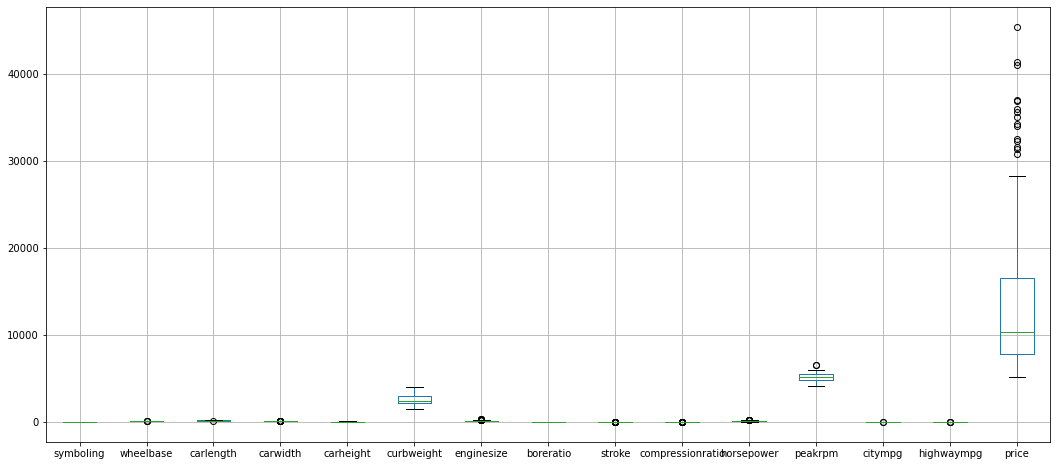

In [217]:
plt.figure(figsize=(18,8))
train.boxplot()

## **HANDLING OUTLIERS**

In [218]:
import pandas as pd

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(train)) * 100
        return column, percentage

numeric_columns = train.select_dtypes(include=['number']).columns
columns_with_outliers = [detect_outliers(column) for column in numeric_columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: wheelbase, Percentage of outliers: 1.46%
Column: carlength, Percentage of outliers: 0.49%
Column: carwidth, Percentage of outliers: 3.90%
Column: enginesize, Percentage of outliers: 4.88%
Column: stroke, Percentage of outliers: 9.76%
Column: compressionratio, Percentage of outliers: 13.66%
Column: horsepower, Percentage of outliers: 2.93%
Column: peakrpm, Percentage of outliers: 0.98%
Column: citympg, Percentage of outliers: 0.98%
Column: highwaympg, Percentage of outliers: 1.46%
Column: price, Percentage of outliers: 7.32%


<AxesSubplot:>

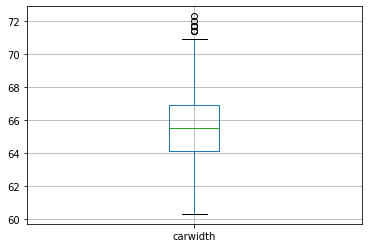

In [219]:
train.boxplot(column=['carwidth'])

<AxesSubplot:>

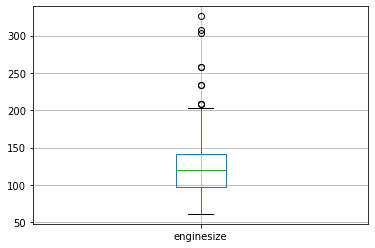

In [220]:
train.boxplot(column=['enginesize'])

<AxesSubplot:>

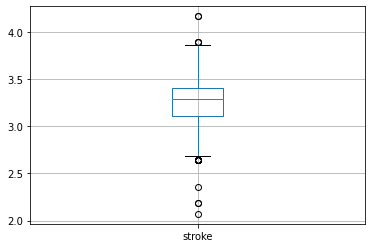

In [221]:
train.boxplot(column=['stroke'])

<AxesSubplot:>

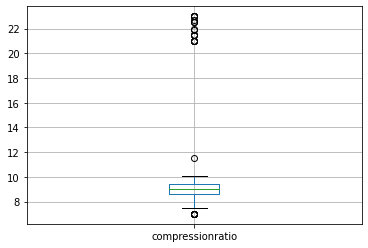

In [222]:
train.boxplot(column=['compressionratio'])

<AxesSubplot:>

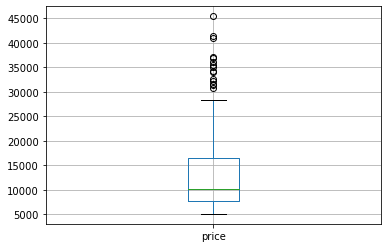

In [223]:
train.boxplot(column=['price'])

In [224]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [225]:
low_leadtime,high_leadtime=remove_outlier(train['enginesize'])
train['enginesize']=np.where(train['enginesize']>high_leadtime,high_leadtime,train['enginesize'])
train['enginesize']=np.where(train['enginesize']<low_leadtime,low_leadtime,train['enginesize'])

In [226]:
low_leadtime,high_leadtime=remove_outlier(train['stroke'])
train['stroke']=np.where(train['stroke']>high_leadtime,high_leadtime,train['stroke'])
train['stroke']=np.where(train['stroke']<low_leadtime,low_leadtime,train['stroke'])

In [227]:
low_leadtime,high_leadtime=remove_outlier(train['compressionratio'])
train['compressionratio']=np.where(train['compressionratio']>high_leadtime,high_leadtime,train['compressionratio'])
train['compressionratio']=np.where(train['compressionratio']<low_leadtime,low_leadtime,train['compressionratio'])

In [228]:
low_leadtime,high_leadtime=remove_outlier(train['price'])
train['price']=np.where(train['price']>high_leadtime,high_leadtime,train['price'])
train['price']=np.where(train['price']<low_leadtime,low_leadtime,train['price'])

<AxesSubplot:>

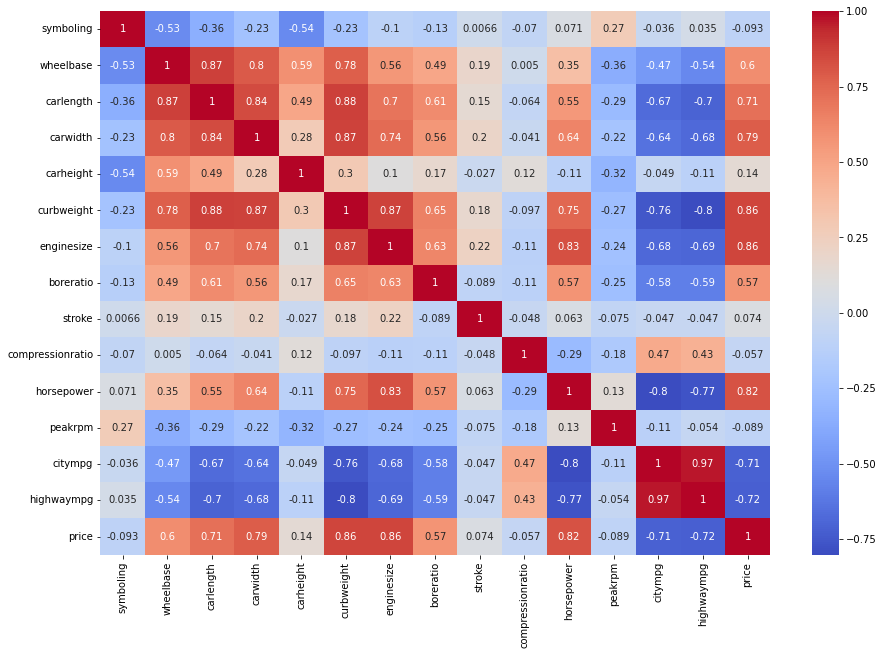

In [229]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

## **ENCODING**

In [231]:
lst=[]
for i in train.columns:
    if train[i].dtype=='object':
        lst.append(i)
lst

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [232]:
ohe=OneHotEncoder()
train_enc=pd.get_dummies(train,columns=['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem'])

In [233]:
train_enc.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152.0,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109.0,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136.0,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## **SPLITTING**

In [234]:
x=train_enc.drop(['price'],axis=1)
y=train_enc['price']

In [235]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=142)

## **MODELLING**

## **LinearRegression**

In [236]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred_train=lr.predict(xtrain)
ypred_test=lr.predict(xtest)


In [237]:
print(r2_score(ytrain,ypred_train))
print(r2_score(ytest,ypred_test))


0.9384646452762262
0.935786770543266


## **RandomForestRegressor**

In [238]:
rf=RandomForestRegressor(n_estimators=300,max_depth=55,min_samples_split=3,min_samples_leaf=2)
rf.fit(xtrain,ytrain)
ypred_train_rf=rf.predict(xtrain)
ypred_test_rf=rf.predict(xtest)

In [239]:
print(r2_score(ytrain,ypred_train_rf))
print(r2_score(ytest,ypred_test_rf)) 

0.9793587588623737
0.9288680349986913


## **XGBRegressor**

In [240]:
XGBoost=xgb.XGBRegressor()            
XGBoost.fit(xtrain,ytrain)
ypred_train_XGBoost = XGBoost.predict(xtrain)
ypred_test_XGBoost = XGBoost.predict(xtest)

In [241]:
print(r2_score(ytrain,ypred_train_XGBoost))
print(r2_score(ytest,ypred_test_XGBoost)) 

0.9997204908432356
0.9341437781543264


## **Lasso**

In [242]:
las=Lasso(alpha=0.6)
las.fit(xtrain,ytrain)
ypred_train_las = las.predict(xtrain)
ypred_test_las = las.predict(xtest)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.008e+07, tolerance: 6.946e+05
  model = cd_fast.enet_coordinate_descent(


In [243]:
print(r2_score(ytrain,ypred_train_las))
print(r2_score(ytest,ypred_test_las)) 

0.9384287292489569
0.9356852284098592


## **Comparing accuracy**

In [244]:
models = pd.DataFrame(
    {
        'Model' : ['LR', 'LR', 'RF', 'RF', 'XGB', 'XGB', 'LS', 'LS'],
        'Group' : [
            'train',
            'test',
            'train',
            'test', 
            'train',
            'test', 
            'train',
            'test'], 
        'Accuracy2' : [
             r2_score(ytrain, ypred_train)*100,
             r2_score(ytest, ypred_test)*100,
             r2_score(ytrain, ypred_train_rf)*100,
             r2_score(ytest, ypred_test_rf)*100,
             r2_score(ytrain, ypred_train_XGBoost)*100,
             r2_score(ytest, ypred_test_XGBoost)*100,
             r2_score(ytrain, ypred_train_las)*100,
             r2_score(ytest, ypred_test_las)*100,
        ]
    }
)

In [245]:
models


,Model,Group,Accuracy2
0,LR,train,93.846465
1,LR,test,93.578677
2,RF,train,97.935876
3,RF,test,92.886803
4,XGB,train,99.972049
5,XGB,test,93.414378
6,LS,train,93.842873
7,LS,test,93.568523


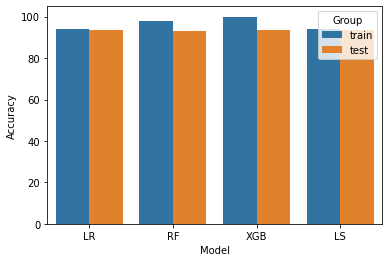

In [246]:
sns.barplot(
    x='Model',
    y='Accuracy2',
    hue='Group',
    data= models
)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()